# Лекция 2. Смешанные регрессионные модели

## Содержание
[2.2 Нарушение допущения о независимости наблюдений](#2.2)   
[2.3 Смешанные регрессионные модели. Реализация в R](#2.3)  
[2.4 Статистическая значимость, обобщённые модели и случайные эффекты](#2.4)    
[2.5 Практические задания](#2.5)


## 2.2 Нарушение допущения о независимости наблюдений<a id='2.2'></a>

**Источники зависимости переменных и проблемы, которые эти источники порождают**:  
1) Повторные измерения (На разных уровнях независимой переменной):  
* Снижение чувствительности теста;  
* Псевдорепликация - искусственное увеличение мощности теста (хорошо выявляет как воздействие влияет на человека, но не раскрывает, как воздействие влияет на всех людей).  
2) Повторные пробы (На одном и том же уровне независимой переменной).  
3) Кластеризация данных (Нет повторных измерений, но данные взяты из нескольких гомогенных групп):  
* Искажение результатов.

## 2.3 Смешанные регрессионные модели. Реализация в R<a id='2.3'></a>

### Основне понятия и тезисы:  
**Эффект** - влияние независимой переменной, с помощью которой предсказывается зависимая переменная.  
**Фиксированный эффект** - влияние независимой переменной, представляющее основной интерес для исследователя (варьируется эксперементатором.  
**Случайный эффект** - влияние независимой переменной, не представляющее первостепенного интереса для исследователя.  
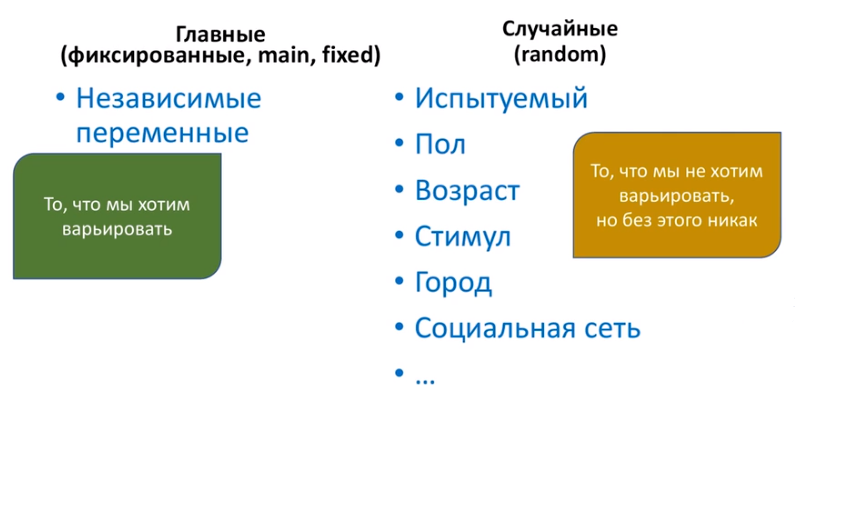  

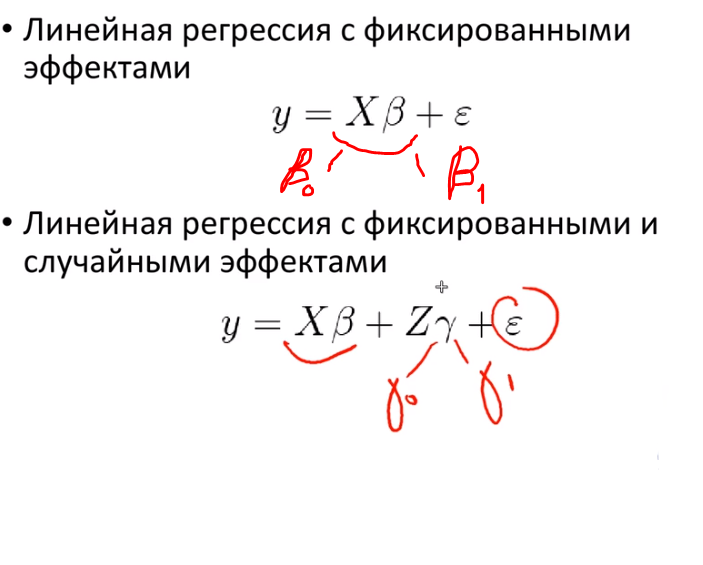  

### Примеры:  

Врачи нескольких клиник решили сравнить две диеты: средиземноморскую и скандинавскую — по их влиянию на продолжительность сна. Исследователи наблюдали две группы людей, которые питались по-разному (средиземноморская или скандинавская диета), и фиксировали продолжительность сна и общее самочувствие испытуемых.

Случайные эффекты: пол испытуемого, место проживания испытуемого, клиника, пол врача.

In [2]:
#install.packages('lme4') 
#install.packages('mlmRev') 

library(lme4) # модель
library(mlmRev) # датасет
library(ggplot2)

#lmer(DV ~ FE + (1 + FE | RE), data = my_data)
#DV - зависимая переменная, FE (fixed effect) - независимая переменная
#RE - случайный эффект

In [3]:
data("Exam")
str(Exam)

'data.frame':	4059 obs. of  10 variables:
 $ school  : Factor w/ 65 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ normexam: num  0.261 0.134 -1.724 0.968 0.544 ...
 $ schgend : Factor w/ 3 levels "mixed","boys",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ schavg  : num  0.166 0.166 0.166 0.166 0.166 ...
 $ vr      : Factor w/ 3 levels "bottom 25%","mid 50%",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ intake  : Factor w/ 3 levels "bottom 25%","mid 50%",..: 1 2 3 2 2 1 3 2 2 3 ...
 $ standLRT: num  0.619 0.206 -1.365 0.206 0.371 ...
 $ sex     : Factor w/ 2 levels "F","M": 1 1 2 1 1 2 2 2 1 2 ...
 $ type    : Factor w/ 2 levels "Mxd","Sngl": 1 1 1 1 1 1 1 1 1 1 ...
 $ student : Factor w/ 650 levels "1","2","3","4",..: 143 145 142 141 138 155 158 115 117 113 ...


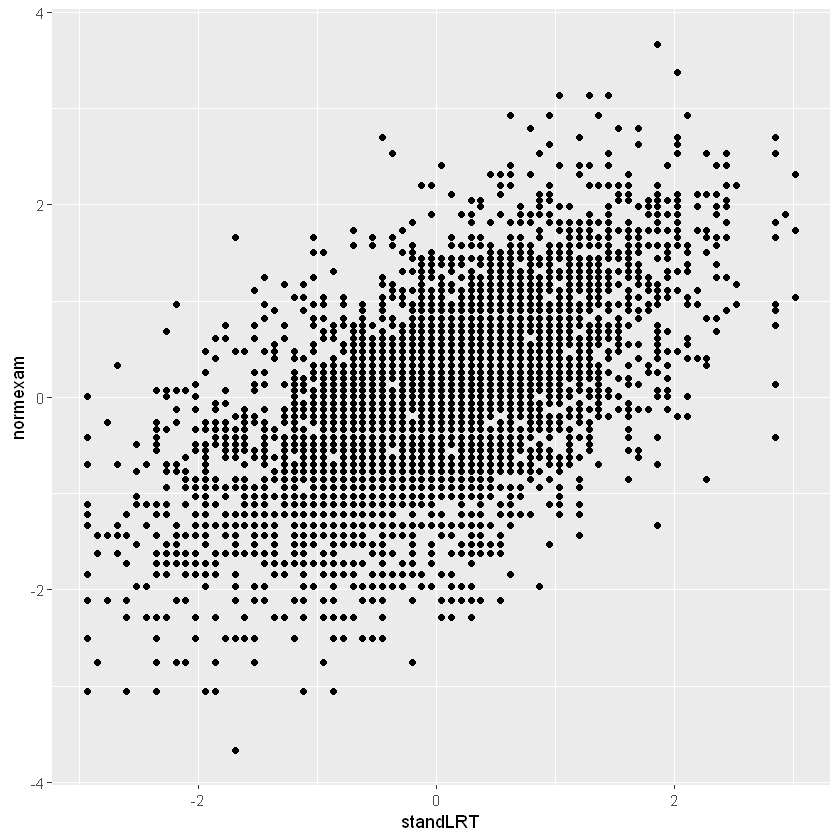

In [4]:
# Изучение связи вступительной оценки(standLRT) с выпускной(normexam) 
ggplot(data = Exam, aes(x = standLRT, y = normexam)) + geom_point()

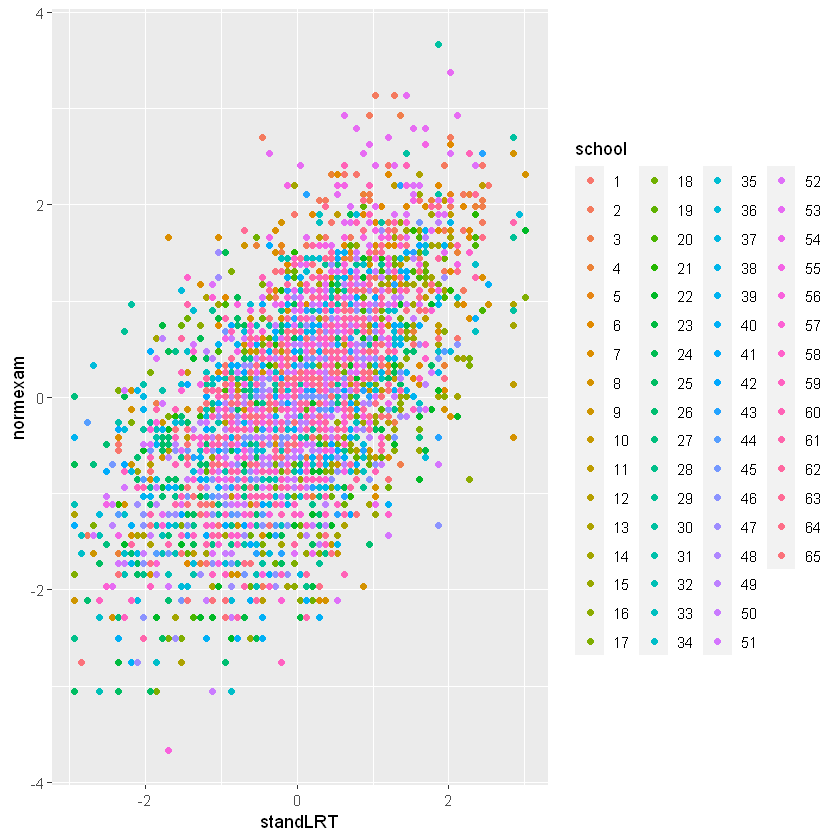

In [5]:
ggplot(data = Exam, aes(x = standLRT, y = normexam, col = school)) + geom_point()

In [6]:
# Простая линейная регрессия с одним главным эффектом
Model1 <- lm(normexam ~ standLRT, data = Exam)

summary(Model1)


Call:
lm(formula = normexam ~ standLRT, data = Exam)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.65615 -0.51848  0.01265  0.54399  2.97399 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.001191   0.012642  -0.094    0.925    
standLRT     0.595057   0.012730  46.744   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8054 on 4057 degrees of freedom
Multiple R-squared:   0.35,	Adjusted R-squared:  0.3499 
F-statistic:  2185 on 1 and 4057 DF,  p-value: < 2.2e-16


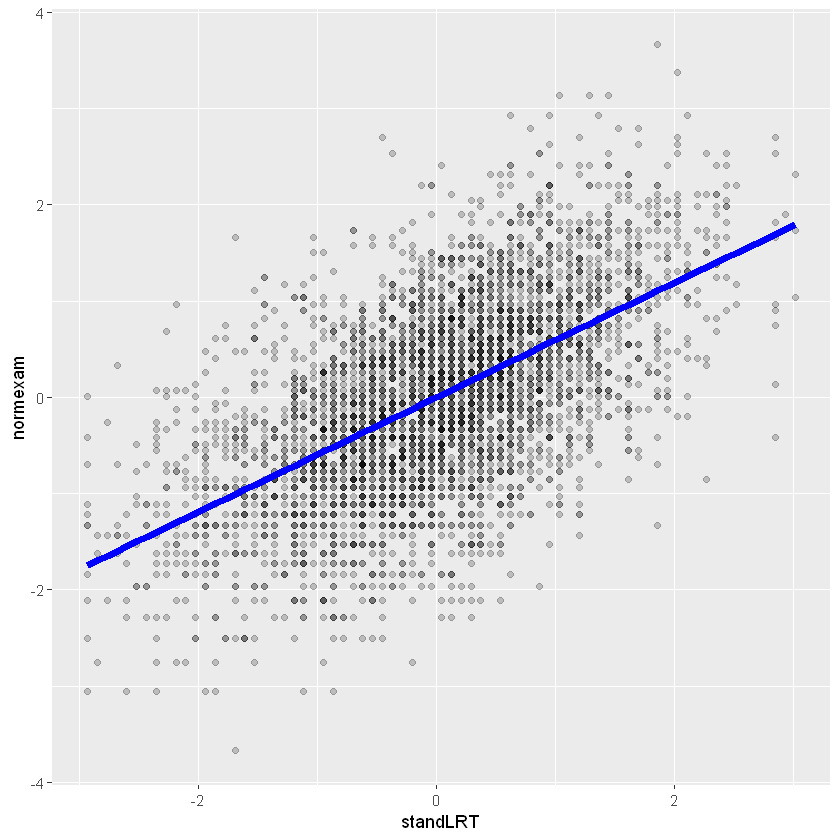

In [7]:
# Взаимосвязь переменных + регресионная прямая
Exam$Model1_pred <- predict(Model1)

ggplot(data = Exam, aes(x = standLRT, y = normexam)) + 
    geom_point(alpha = 0.2) + 
    geom_line(data = Exam, aes(x = standLRT, y = Model1_pred), col = 'blue', linewidth=2)

In [8]:
# Главный эффект + случайный свободный член
Model2 <- lmer(normexam ~ standLRT + (1|school), data = Exam)
summary(Model2)

Linear mixed model fit by REML ['lmerMod']
Formula: normexam ~ standLRT + (1 | school)
   Data: Exam

REML criterion at convergence: 9368.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7166 -0.6302  0.0294  0.6849  3.2673 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.09384  0.3063  
 Residual             0.56587  0.7522  
Number of obs: 4059, groups:  school, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept) 0.002323   0.040354   0.058
standLRT    0.563307   0.012468  45.180

Correlation of Fixed Effects:
         (Intr)
standLRT 0.008 

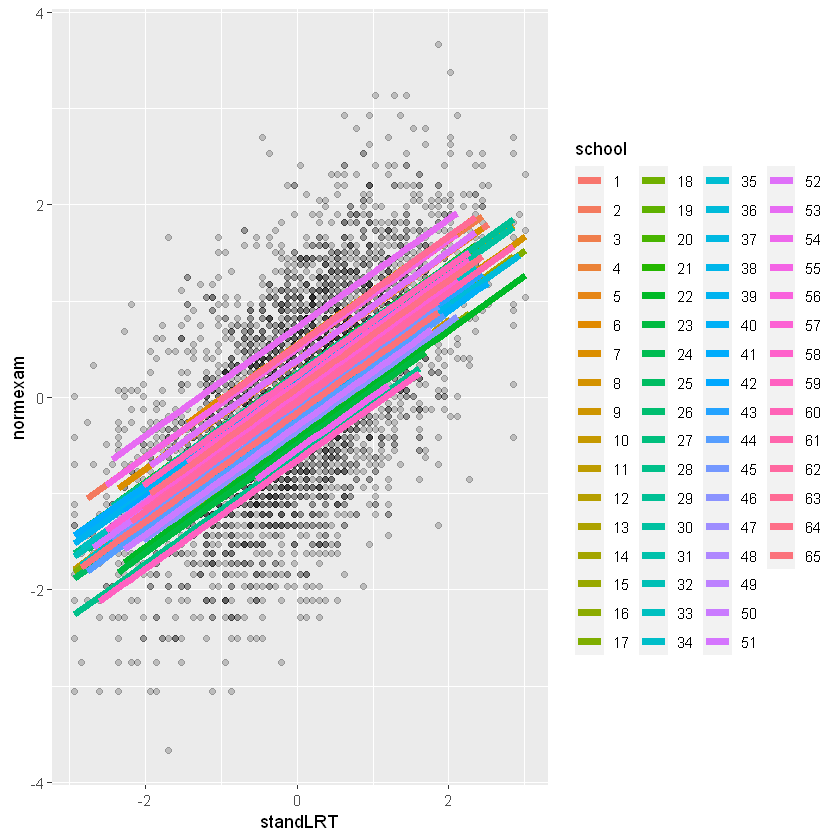

In [9]:
# Взаимосвязь переменных + регресионная прямая для каждой школы
Exam$Model2_pred <- predict(Model2)

ggplot(data = Exam, aes(x = standLRT, y = normexam)) + 
    geom_point(alpha = 0.2) + 
    geom_line(data = Exam, aes(x = standLRT, y = Model2_pred, col = school), linewidth=2)

In [10]:
# Главный эффект + случайный свободный член + случайный угловой коэффициент
Model3 <- lmer(normexam ~ standLRT + (1 + standLRT |school), data = Exam)
summary(Model3)

Linear mixed model fit by REML ['lmerMod']
Formula: normexam ~ standLRT + (1 + standLRT | school)
   Data: Exam

REML criterion at convergence: 9327.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8323 -0.6317  0.0339  0.6834  3.4562 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 school   (Intercept) 0.09212  0.3035       
          standLRT    0.01497  0.1223   0.49
 Residual             0.55364  0.7441       
Number of obs: 4059, groups:  school, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.01165    0.04011   -0.29
standLRT     0.55653    0.02011   27.67

Correlation of Fixed Effects:
         (Intr)
standLRT 0.365 

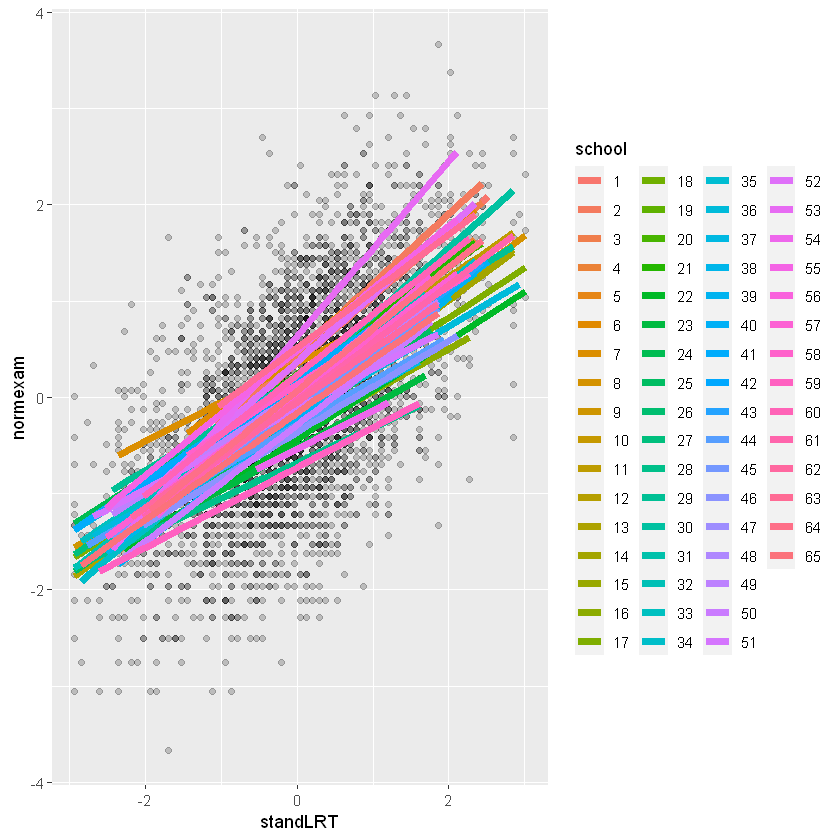

In [11]:
Exam$Model3_pred <- predict(Model3)

ggplot(data = Exam, aes(x = standLRT, y = normexam)) + 
    geom_point(alpha = 0.2) + 
    geom_line(data = Exam, aes(x = standLRT, y = Model3_pred, col = school), linewidth=2)

In [12]:
# Главный эффект + случайный угловой коэффициент
Model4 <- lmer(normexam ~ standLRT + (0 + standLRT |school), data = Exam)
summary(Model4)

Linear mixed model fit by REML ['lmerMod']
Formula: normexam ~ standLRT + (0 + standLRT | school)
   Data: Exam

REML criterion at convergence: 9700.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2793 -0.6501  0.0241  0.6833  3.9119 

Random effects:
 Groups   Name     Variance Std.Dev.
 school   standLRT 0.0259   0.1609  
 Residual          0.6251   0.7906  
Number of obs: 4059, groups:  school, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.01463    0.01284  -1.139
standLRT     0.58782    0.02423  24.256

Correlation of Fixed Effects:
         (Intr)
standLRT 0.000 

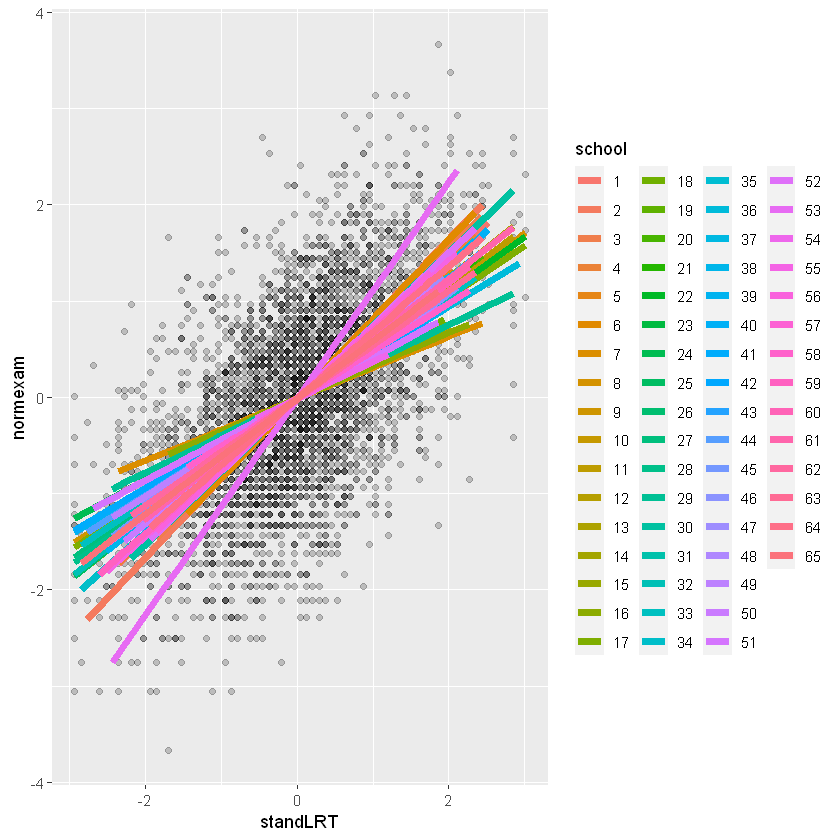

In [13]:
Exam$Model4_pred <- predict(Model4)

ggplot(data = Exam, aes(x = standLRT, y = normexam)) + 
    geom_point(alpha = 0.2) + 
    geom_line(data = Exam, aes(x = standLRT, y = Model4_pred, col = school), linewidth=2)

In [14]:
# Нескоррелированные случайные эффекты
# Чтобы указать, что коэффициенты не коррелируют можно также использовать ||. Например, (1+standLRT||school)
Model5 <- lmer(normexam ~ standLRT + (1|school) + (0 + standLRT |school), data = Exam)
summary(Model5)

Linear mixed model fit by REML ['lmerMod']
Formula: normexam ~ standLRT + (1 | school) + (0 + standLRT | school)
   Data: Exam

REML criterion at convergence: 9335.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8108 -0.6347  0.0273  0.6846  3.4465 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.09195  0.3032  
 school.1 standLRT    0.01474  0.1214  
 Residual             0.55363  0.7441  
Number of obs: 4059, groups:  school, 65

Fixed effects:
             Estimate Std. Error t value
(Intercept) -0.008091   0.040084  -0.202
standLRT     0.557023   0.020097  27.716

Correlation of Fixed Effects:
         (Intr)
standLRT 0.005 

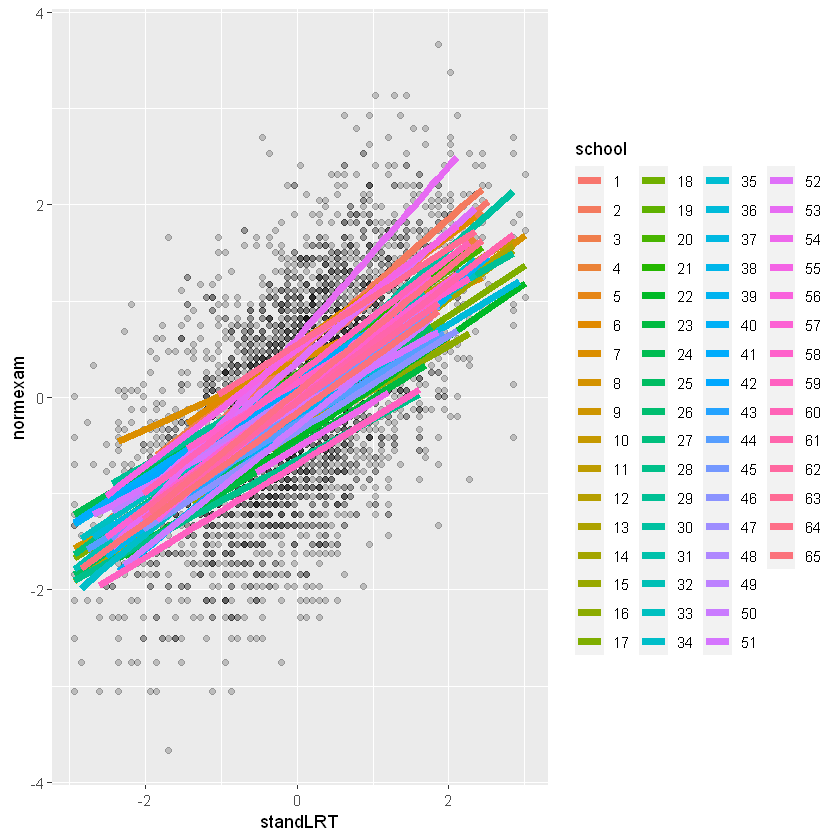

In [15]:
Exam$Model5_pred <- predict(Model5)

ggplot(data = Exam, aes(x = standLRT, y = normexam)) + 
    geom_point(alpha = 0.2) + 
    geom_line(data = Exam, aes(x = standLRT, y = Model5_pred, col = school), linewidth=2)

___________________________________________________________________________________________________________________________
Во введении к модулю мы говорили о том, что в некоторых случаях случайные эффекты можно учитывать как главные в рамках привычных статистических методов. Ниже вы можете увидеть, как это было сделано с помощью обычной линейной регрессии. Соотнесите команды в R со случайным эффектом, который мы пытаемся учесть.  

*Модель, предсказывающая standLRT по normexam с учётом того, что все школы различаются по среднему уровню сдачи выпускного экзамена (один случайный эффект: свободный член по переменной “school”)* - **lm(standLRT ~ normexam + school, data = Exam)**  

*Модель, предсказывающая standLRT по normexam с учётом того, что разные школы отличаются по взаимосвязи между предиктором и зависимой переменной (один случайный эффект: угловой коэффициент по переменной “school”)* - **lm(standLRT ~ normexam + school:normexam, data = Exam)**  

*Модель, предсказывающая standLRT по normexam с учётом того, что разные школы отличаются по среднему уровню сдачи выпускного экзамена, а также по взаимосвязи между предиктором и зависимой переменной (два случайных эффекта: свободный член и угловой коэффициент по переменной “school”)* - **lm(standLRT ~ normexam*school, data = Exam)**

## 2.4 Статистическая значимость, обобщённые модели и случайные эффекты<a id = '2.4'></a>

Чтобы оценить важность предиктора для предсказания модели, можно использовать несколько способов:  
1) Сравнение моделей;  
2) Статистические поправки.

### Примеры:

In [ ]:
library(lme4)
library(mlmRev)
library(ggplot2)

In [16]:
# Сравнение моделей 
# Главный эффект + случайный свободный член
Model2 <- lmer(normexam ~ standLRT + (1|school), REML = FALSE, data = Exam)
summary(Model2)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: normexam ~ standLRT + (1 | school)
   Data: Exam

     AIC      BIC   logLik deviance df.resid 
  9365.2   9390.5  -4678.6   9357.2     4055 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7162 -0.6304  0.0287  0.6844  3.2680 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.09213  0.3035  
 Residual             0.56573  0.7522  
Number of obs: 4059, groups:  school, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept) 0.002391   0.040023    0.06
standLRT    0.563371   0.012465   45.20

Correlation of Fixed Effects:
         (Intr)
standLRT 0.008 

In [17]:
# Пустая модель
Model0 <- lmer(normexam ~ 1 + (1|school), REML = FALSE, data = Exam)
summary(Model0)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: normexam ~ 1 + (1 | school)
   Data: Exam

     AIC      BIC   logLik deviance df.resid 
 11016.6  11035.6  -5505.3  11010.6     4056 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9471 -0.6486  0.0117  0.6992  3.6578 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.1686   0.4107  
 Residual             0.8478   0.9207  
Number of obs: 4059, groups:  school, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.01317    0.05363  -0.246

In [18]:
# F_test
anova(Model0, Model1)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Model0,3,11016.65,11035.575,-5505.324,11010.65,NA,NA,NA
Model1,3,9766.51,9785.436,-4880.255,9760.51,1250.139,0,NA


In [20]:
#install.packages('lmerTest')
library(lmerTest) # для аппроксимации величины степеней свободы

# Главный эффект + случайный свободный член
Model2 <- lmer(normexam ~ standLRT + (1|school), data = Exam)
summary(Model2)

# t-tests use Satterthwaite's method

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: normexam ~ standLRT + (1 | school)
   Data: Exam

REML criterion at convergence: 9368.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7166 -0.6302  0.0294  0.6849  3.2673 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.09384  0.3063  
 Residual             0.56587  0.7522  
Number of obs: 4059, groups:  school, 65

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.323e-03  4.035e-02 6.073e+01   0.058    0.954    
standLRT    5.633e-01  1.247e-02 4.050e+03  45.180   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
standLRT 0.008 

In [21]:
# Обобщенные смешанные модели
Exam$school_type <- ifelse(Exam$type == 'Mxd', 1, 0)

# Смешанная логистическая регрессия
Model6 <- glmer(school_type ~ normexam + (1|school), family = "binomial", data = Exam)
summary(Model6)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: school_type ~ normexam + (1 | school)
   Data: Exam

     AIC      BIC   logLik deviance df.resid 
   108.9    127.9    -51.5    102.9     4056 

Scaled residuals: 
      Min        1Q    Median        3Q       Max 
-0.036671 -0.006307  0.000246  0.000266  0.000308 

Random effects:
 Groups Name        Variance Std.Dev.
 school (Intercept) 8835     94      
Number of obs: 4059, groups:  school, 65

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  16.4154     1.4475  11.341   <2e-16 ***
normexam     -0.0967     0.9467  -0.102    0.919    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
normexam 0.009 

In [26]:
# Предсказания на новых датасетах
new_Exam <- Exam[sample(1:nrow(Exam), 100), ]
new_Exam$school <- sample(101:200)

predict(Model2, new_Exam, allow.new.levels = T)

2835        1119        2715        3240         754        1619 
 0.30448527  1.09597373  0.21136895 -0.02142169  0.35104315  0.72350844 
       1063        2057         284         482        1240        1858 
-0.76635227  0.72350844  0.67695000 -0.02142169  0.95629897  0.02513630 
       3685         405        2473         410         513        2590 
 0.53727580 -0.48700330 -0.34732910 -0.11453801 -0.44044542  0.25792683 
       3445        3228        2181        1742        3070         743 
 0.35104315 -0.67323595 -0.95258492  0.16481051 -0.06798013  0.86318264 
       1205        2475        2978         389        1106        2985 
-1.13881700  1.14253161  0.11825263 -0.11453801  0.39760159  0.49071792 
       3415         874        2006        2289         177        2620 
 1.18909006  0.81662476 -0.34732910  0.02513630  0.16481051 -0.39388698 
       2967        3413        2106         102        2949        2662 
-1.13881700  0.49071792  0.44415947  1.14253161  0.02513630  0.39760159 
       2905        1966         219        2239         998        2527 
 0.02513630 -0.06798013 -1.04570068  0.67695000  0.07169418  0.21136895 
       2505        1572        1065        2731         994        2266 
 0.07169418  0.11825263 -0.06798013 -0.48700330  0.35104315  0.02513630 
        714        3933        3278        2359        2055        2539 
 0.63039212  0.67695000 -0.20765434 -0.44044542 -0.53356118 -0.02142169 
       2247        2376         623        2708         138        1061 
 0.02513630  0.39760159 -0.11453801 -0.58011963  0.07169418  0.30448527 
       2226         123        2823        2474         853        3009 
 0.02513630  1.23564794 -0.02142169 -0.58011963 -0.20765434 -0.34732910 
        475         969         569         386        1913        2583 
 0.72350844  0.53727580 -0.90602648 -0.06798013 -0.53356118 -0.90602648 
       2065        2878        1947        2830         511           4 
-0.06798013  0.02513630 -0.44044542 -0.48700330 -0.39388698  0.11825263 
       2122        2420          21         495        1360        3294 
 0.39760159  0.95629897 -0.20765434 -0.30077066 -0.34732910 -0.20765434 
        442         408        1274        3660        1369        3662 
-0.11453801  1.09597373 -0.16109646 -0.48700330  0.30448527 -1.09225912 
       1722         793        3645        1317 
 0.44415947  0.44415947 -0.11453801  0.02513630

In [ ]:
# Исследование случайных эффектов
# fixef() - получение информации о фиксированных эффектах
# ranef() - получение информации о случайных эффектах

In [28]:
fixef(Model3)

(Intercept)    standLRT 
-0.01164925  0.55653475

In [29]:
ranef(Model3)

$school
    (Intercept)     standLRT
1   0.375383819  0.125697850
2   0.470675769  0.165713931
3   0.481100952  0.080462260
4   0.034775274  0.128874470
5   0.246933269  0.072661033
6   0.519898503  0.057743604
7   0.365081325 -0.151940089
8  -0.012075888  0.007121824
9  -0.177384783 -0.089551620
10 -0.313929941 -0.137501408
11  0.201251559 -0.024305525
12 -0.054968415 -0.038426364
13 -0.126013137  0.030908119
14 -0.156292239  0.029257190
15 -0.176352151  0.075844339
16 -0.363933710 -0.120152357
17 -0.167517424 -0.051735585
18 -0.063119195 -0.105655801
19 -0.009500954  0.071079397
20  0.217923501  0.015369949
21  0.250939814  0.024930983
22 -0.422566780 -0.047152291
23 -0.509489100 -0.115998723
24  0.181871492 -0.050722297
25 -0.234104652 -0.024720708
26 -0.020479018 -0.008590529
27  0.037471844  0.009773772
28 -0.669151726 -0.187454220
29  0.212053657 -0.079073405
30  0.161560721  0.146182445
31  0.010708815 -0.051748769
32  0.047523728  0.061580061
33  0.041124485 -0.022489465
34 -0.